In [24]:
import pandas as pd

#read_csv can read in just about any plain-text tabular data
#data = pd.read_csv('abide2.tsv', sep='\t')
#data.head()

In [ ]:
#data.info()

In [25]:
!pip install nilearn

In [29]:
from nilearn import datasets

development_dataset = datasets.fetch_development_fmri(n_subjects=10)

**nilearn** enables approachable and versatile analyses of brain volumes. It provides statistical and machine-learning tools, with instructive documentation & open community.
It supports general linear model (GLM) based analysis and leverages the scikit-learn Python toolbox for multivariate statistics with applications such as predictive modelling, classification, decoding, or connectivity analysis.

In [30]:
development_dataset.description

b"The movie watching based brain development dataset (fMRI)\n\n\nNotes\n-----\nThis functional MRI dataset is used for teaching how to use\nmachine learning to predict age from naturalistic stimuli (movie)\nwatching with Nilearn.\n\nThe dataset consists of 50 children (ages 3-13) and 33 young adults (ages\n18-39). This dataset can be used to try to predict who are adults and\nwho are children.\n\nThe data is downsampled to 4mm resolution for convenience. The original\ndata is downloaded from OpenNeuro.\n\nFor full information about pre-processing steps on raw-fMRI data, have a look\nat README at https://osf.io/wjtyq/\n\nFull pre-processed data: https://osf.io/5hju4/files/\n\nRaw data can be accessed from : https://openneuro.org/datasets/ds000228/versions/1.0.0\n\nContent\n-------\n    :'func': functional MRI Nifti images (4D) per subject\n    :'confounds': TSV file contain nuisance information per subject\n    :'phenotypic': Phenotypic informaton for each subject such as age,\n        

The movie watching based brain development dataset (fMRI)\n\n\nNotes\n-----\nThis functional MRI dataset is used for teaching how to use\nmachine learning to predict age from naturalistic stimuli (movie)\nwatching with Nilearn.\n\nThe dataset consists of 50 children (ages 3-13) and 33 young adults (ages\n18-39). This dataset can be used to try to predict who are adults and\nwho are children.\n\nThe data is downsampled to 4mm resolution for convenience. The original\ndata is downloaded from OpenNeuro.\n\nFor full information about pre-processing steps on raw-fMRI data, have a look\nat README at https://osf.io/wjtyq/\n\nFull pre-processed data: https://osf.io/5hju4/files/\n\nRaw data can be accessed from : https://openneuro.org/datasets/ds000228/versions/1.0.0\n\nContent\n-------\n    :'func': functional MRI Nifti images (4D) per subject\n    :'confounds': TSV file contain nuisance information per subject\n    :'phenotypic': Phenotypic informaton for each subject such as age,\n                   age group, gender, handedness.\n\n\nReferences\n----------\nPlease cite this paper if you are using this dataset:\nRichardson, H., Lisandrelli, G., Riobueno-Naylor, A., & Saxe, R. (2018).\nDevelopment of the social brain from age three to twelve years.\nNature communications, 9(1), 1027.\nhttps://www.nature.com/articles/s41467-018-03399-2\n\nLicence: usage is unrestricted for non-commercial research purposes.

In [31]:
development_dataset.phenotypic

array([('sub-pixar123', 27.06      , 'Adult', 'adult', 'F', 'R'),
       ('sub-pixar124', 33.44      , 'Adult', 'adult', 'M', 'R'),
       ('sub-pixar001',  4.77481177, '4yo', 'child', 'M', 'R'),
       ('sub-pixar002',  4.8569473 , '4yo', 'child', 'F', 'R'),
       ('sub-pixar003',  4.15331964, '4yo', 'child', 'F', 'R'),
       ('sub-pixar004',  4.47364819, '4yo', 'child', 'F', 'R'),
       ('sub-pixar005',  4.83778234, '4yo', 'child', 'F', 'R'),
       ('sub-pixar006',  3.60574949, '3yo', 'child', 'F', 'R'),
       ('sub-pixar007',  4.24914442, '4yo', 'child', 'M', 'R'),
       ('sub-pixar008',  3.52908966, '3yo', 'child', 'F', 'R')],
      dtype=[('participant_id', '<U12'), ('Age', '<f8'), ('AgeGroup', '<U6'), ('Child_Adult', '<U5'), ('Gender', '<U4'), ('Handedness', '<U4')])

In [32]:
development_dataset.confounds

['/root/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_desc-reducedConfounds_regressors.tsv',
 '/root/nilearn_data/development_fmri/development_fmri/sub-pixar124_task-pixar_desc-reducedConfounds_regressors.tsv',
 '/root/nilearn_data/development_fmri/development_fmri/sub-pixar001_task-pixar_desc-reducedConfounds_regressors.tsv',
 '/root/nilearn_data/development_fmri/development_fmri/sub-pixar002_task-pixar_desc-reducedConfounds_regressors.tsv',
 '/root/nilearn_data/development_fmri/development_fmri/sub-pixar003_task-pixar_desc-reducedConfounds_regressors.tsv',
 '/root/nilearn_data/development_fmri/development_fmri/sub-pixar004_task-pixar_desc-reducedConfounds_regressors.tsv',
 '/root/nilearn_data/development_fmri/development_fmri/sub-pixar005_task-pixar_desc-reducedConfounds_regressors.tsv',
 '/root/nilearn_data/development_fmri/development_fmri/sub-pixar006_task-pixar_desc-reducedConfounds_regressors.tsv',
 '/root/nilearn_data/development_fmri/development_fmri/s

The process of removing motion-based artifacts from our data is called confound regression, which is essentially fitting a linear model using motion estimates as regressors then subtracting it out from the signal. Hopefully in this process we get a closer estimate of what the actual brain-induced BOLD signal looks like.

**Preprocess** usually involve: Motion correction; Normalization; Smoothing

**nibabel**: Read / write access to some common neuroimaging file formats

In [33]:
len(development_dataset.description)

1383

In [34]:
import nibabel as nib

img = nib.load(development_dataset.func[0])
img.shape

(50, 59, 50, 168)

In [35]:
img.instance_to_filename

<bound method FileBasedImage.instance_to_filename of <class 'nibabel.nifti1.Nifti1Image'>>

In [36]:
img.files_types

(('image', '.nii'),)


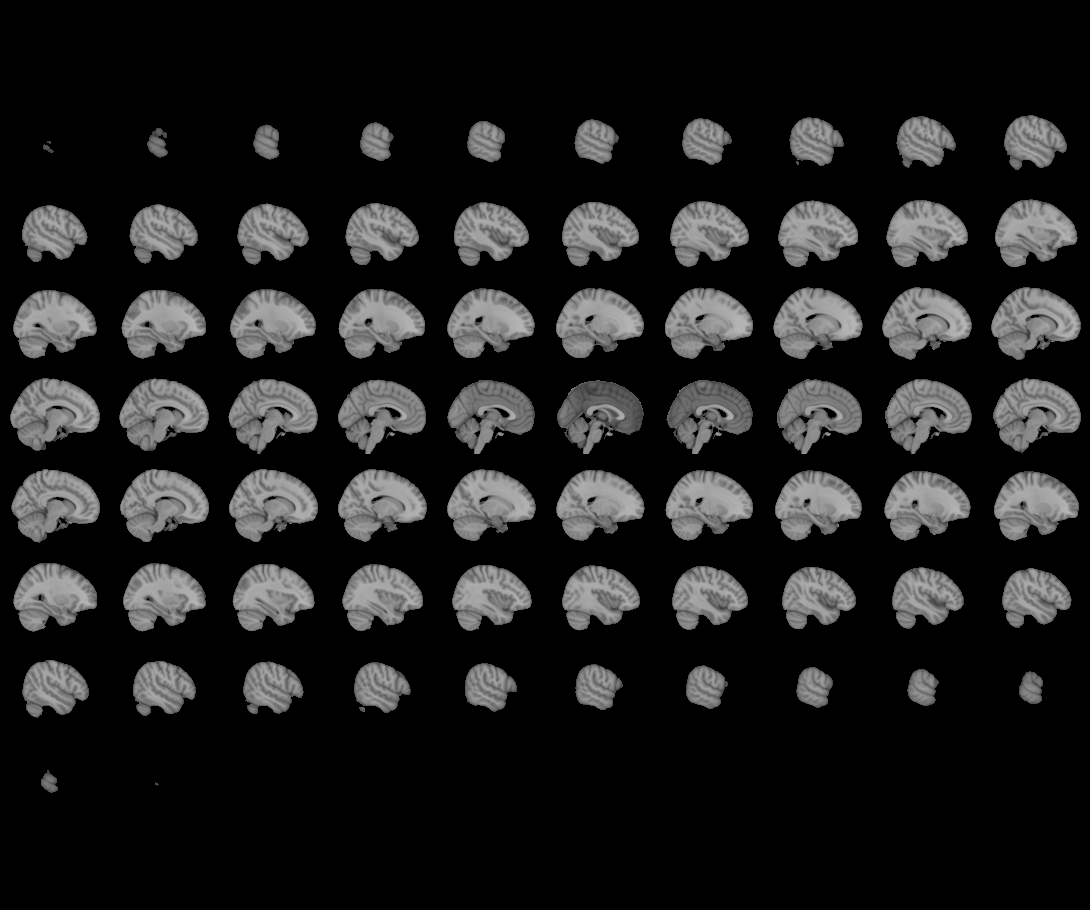
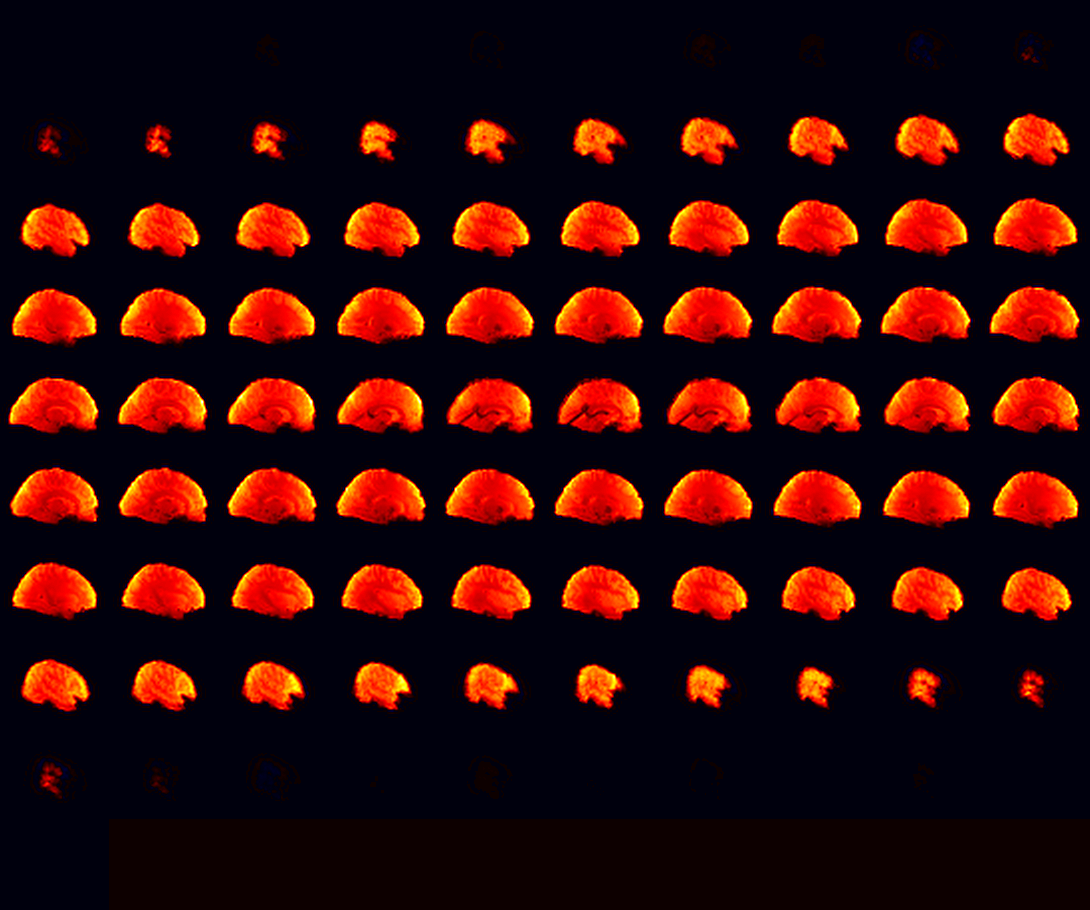

In [37]:
import matplotlib.pyplot as plt
from nilearn import image
from nilearn import plotting

mean_image = image.mean_img(development_dataset.func[0])
plotting.view_img(mean_image, threshold=None)

####Extracting signal from fMRI volumes

MSDL(multi-subject dictionary learning): a probabilistic ROIs across the brain

In [38]:
import numpy as np

msdl_atlas = datasets.fetch_atlas_msdl()

#harvard_atlast = datasets.fetch_atlas_harvard_oxford(atlas_name='sub-prob-2mm')
msdl_coords = msdl_atlas.region_coords
n_regions = len(msdl_coords)

print(f'MSDL has {n_regions} ROIs, parts of the following networks : \n{np.unique(msdl_atlas.networks)}.')


MSDL has 39 ROIs, parts of the following networks : 
[b'Ant IPS' b'Aud' b'Basal' b'Cereb' b'Cing-Ins' b'D Att' b'DMN'
 b'Dors PCC' b'L V Att' b'Language' b'Motor' b'Occ post' b'R V Att'
 b'Salience' b'Striate' b'Temporal' b'Vis Sec'].


/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:2349: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


/usr/local/lib/python3.7/dist-packages/nilearn/plotting/displays.py:103: UserWarning: No contour levels were found within the data range.
  **kwargs)


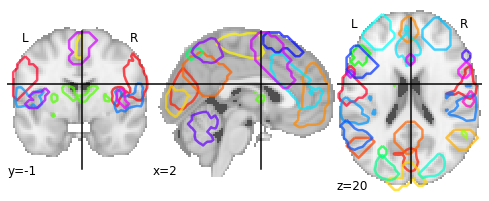

In [39]:
plotting.plot_prob_atlas(msdl_atlas.maps)

surface atlas vs volumetric atlas

How much, and Where questions

In [40]:
from nilearn import input_data

masker = input_data.NiftiMapsMasker(msdl_atlas.maps, resampling_target="data", t_r=2, detrend=True, low_pass=0.1, high_pass=0.01).fit()

###Feature Selection and weights

In [41]:
roi_time_series = masker.transform(development_dataset.func[0])
roi_time_series.shape

(168, 39)

weights: 168 recordings, 39 roi, but it transposed

Brain Synchrony: Connectome

In [42]:
from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([roi_time_series])[0]

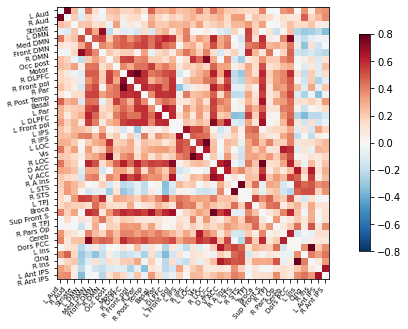

In [43]:
np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix, labels=msdl_atlas.labels,
                     vmax=0.8, vmin=-0.8, colorbar=True)

In [44]:
plotting.view_connectome(correlation_matrix, edge_threshold=0.2,
                         node_coords=msdl_atlas.region_coords)

Output hidden; open in https://colab.research.google.com to view.

###Noise sources

In [45]:
pd.read_table(development_dataset.confounds[0]).head()

,trans_x,trans_y,trans_z,rot_x,rot_y,rot_z,framewise_displacement,a_comp_cor_00,a_comp_cor_01,a_comp_cor_02,a_comp_cor_03,a_comp_cor_04,a_comp_cor_05,csf,white_matter
0,-0.000233,-0.076885,0.062321,0.000732,0.000352,0.000841,0.000000,-0.099871,-0.007286,0.001780,-0.008073,0.030945,-0.022393,439.699409,451.645460
1,-0.006187,-0.078395,0.056773,0.000112,0.000187,0.000775,0.055543,-0.019437,-0.042308,0.016735,-0.012099,0.088777,-0.006171,439.471640,451.103437
2,-0.000227,-0.069893,0.083102,0.000143,0.000364,0.000716,0.054112,0.009096,-0.053206,-0.030388,-0.052925,0.019922,0.014776,439.744498,450.981505
3,0.002492,-0.074707,0.060337,0.000202,0.000818,0.000681,0.057667,0.060195,-0.083195,0.003578,-0.037011,0.026946,0.002505,440.772620,450.600261
4,-0.000226,-0.084204,0.085079,0.000183,0.000548,0.000682,0.051438,0.049833,-0.089819,-0.020825,-0.079329,0.008516,-0.000938,440.115442,450.678959


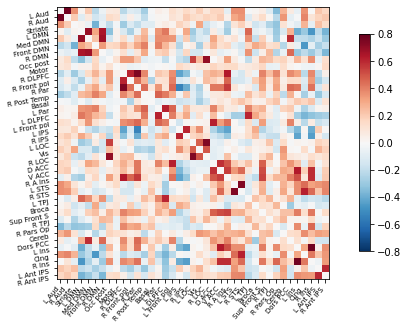

In [46]:
corrected_roi_time_series = masker.transform(
    development_dataset.func[0], confounds=development_dataset.confounds[0])
corrected_correlation_matrix = correlation_measure.fit_transform(
    [corrected_roi_time_series])[0]
np.fill_diagonal(corrected_correlation_matrix, 0)
plotting.plot_matrix(corrected_correlation_matrix, labels=msdl_atlas.labels,
                     vmax=0.8, vmin=-0.8, colorbar=True)

In [47]:
plotting.view_connectome(corrected_correlation_matrix, edge_threshold=0.2,
                         node_coords=msdl_atlas.region_coords)

Output hidden; open in https://colab.research.google.com to view.

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn import (datasets, input_data, plotting)
from nilearn.connectome import ConnectivityMeasure

development_dataset = datasets.fetch_development_fmri(n_subjects=30)
msdl_atlas = datasets.fetch_atlas_msdl()

masker = input_data.NiftiMapsMasker(
    msdl_atlas.maps, resampling_target="data",
    t_r=2, detrend=True,
    low_pass=0.1, high_pass=0.01).fit()
correlation_measure = ConnectivityMeasure(kind='correlation')

 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


Downloaded 5734400 of 6752586 bytes (84.9%,    0.4s remaining) ...done. (4 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)
/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:2349: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [49]:
children = []
pooled_subjects = []
groups = []  # child or adult

for func_file, confound_file, phenotypic in zip(
        development_dataset.func,
        development_dataset.confounds,
        development_dataset.phenotypic):

    time_series = masker.transform(func_file, confounds=confound_file)
    pooled_subjects.append(time_series)

    if phenotypic['Child_Adult'] == 'child':
        children.append(time_series)

    groups.append(phenotypic['Child_Adult'])

print('Data has {0} children.'.format(len(children)))

Data has 24 children.


In [50]:
phenotypic

('sub-pixar024', 4.05749487, '4yo', 'child', 'M', 'R')

In [51]:
print(pooled_subjects[0].shape)

(168, 39)


In [52]:
correlation_matrices = correlation_measure.fit_transform(children)

In [53]:
print('Correlations of children are stacked in an array of shape {0}'
      .format(correlation_matrices.shape))

Correlations of children are stacked in an array of shape (24, 39, 39)


In [54]:
mean_correlation_matrix = correlation_measure.mean_
print('Mean correlation has shape {0}.'.format(mean_correlation_matrix.shape))

Mean correlation has shape (39, 39).


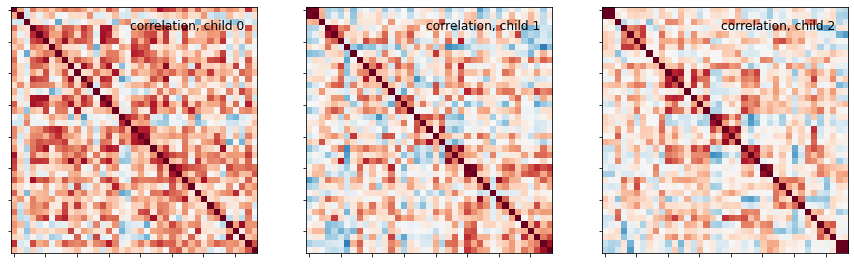

In [55]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (matrix, ax) in enumerate(zip(correlation_matrices, axes)):
    plotting.plot_matrix(matrix, colorbar=False, axes=ax,
                         vmin=-0.8, vmax=0.8,
                         title='correlation, child {}'.format(i))

In [56]:
plotting.view_connectome(mean_correlation_matrix, msdl_atlas.region_coords,
                         edge_threshold=0.2,
                         title='mean connectome over all children')

Output hidden; open in https://colab.research.google.com to view.

In [57]:
partial_correlation_measure = ConnectivityMeasure(kind='partial correlation')
partial_correlation_matrices = partial_correlation_measure.fit_transform(
    children)

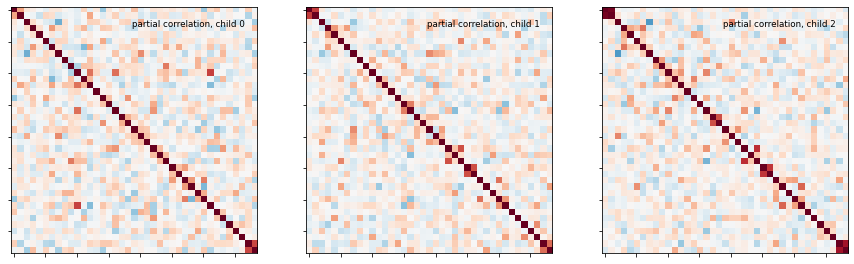

In [58]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (matrix, ax) in enumerate(zip(partial_correlation_matrices, axes)):
    plotting.plot_matrix(matrix, colorbar=False, axes=ax,
                         vmin=-0.8, vmax=0.8,
                         title='partial correlation, child {}'.format(i))

In [59]:
plotting.view_connectome(
    partial_correlation_measure.mean_, msdl_atlas.region_coords,
    edge_threshold=0.2,
    title='mean partial correlation over all children')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
tangent_measure = ConnectivityMeasure(kind='tangent')

In [ ]:
tangent_matrices = tangent_measure.fit_transform(children)

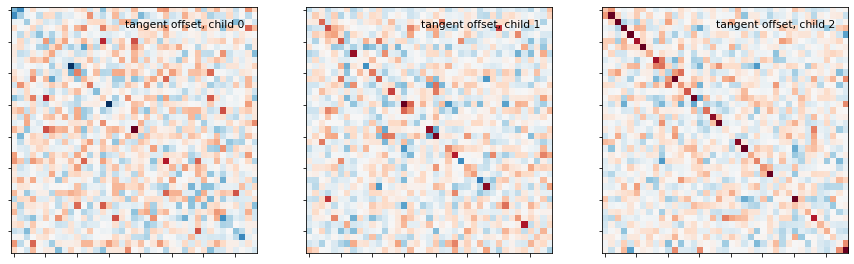

In [ ]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (matrix, ax) in enumerate(zip(tangent_matrices, axes)):
    plotting.plot_matrix(matrix, colorbar=False, axes=ax,
                         vmin=-0.8, vmax=0.8,
                         title='tangent offset, child {}'.format(i))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import LinearSVC

kinds = ['correlation', 'partial correlation', 'tangent']
_, classes = np.unique(groups, return_inverse=True)
cv = StratifiedShuffleSplit(n_splits=15, random_state=0, test_size=5)
pooled_subjects = np.asarray(pooled_subjects)

In [ ]:
classes

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    ax.scatter(range(len(X)), [ii + 2.5] * len(X),
               c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+2.2, -.2], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

In [ ]:
groups

['adult',
 'adult',
 'adult',
 'adult',
 'adult',
 'adult',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child']

In [ ]:
cv

StratifiedShuffleSplit(n_splits=15, random_state=0, test_size=5,
            train_size=None)

NameError: ignored

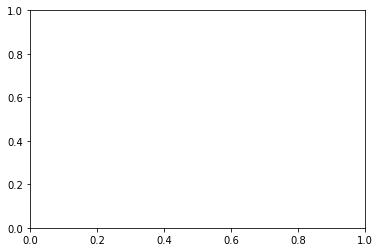

In [ ]:
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)

#train, test in cv.split(pooled_subjects, classes)


#fig, ax = plt.subplots()
#cv = StratifiedKFold(n_splits=10)
#plot_cv_indices(cv, train[0], train[1], ax)


fig, ax = plt.subplots()
cv = KFold(n_splits=10)
plot_cv_indices(cv, X, Y, [0,1], ax, n_splits=10)

In [ ]:
scores = {}
for kind in kinds:
    scores[kind] = []
    for train, test in cv.split(pooled_subjects, classes):
        # *ConnectivityMeasure* can output the estimated subjects coefficients
        # as a 1D arrays through the parameter *vectorize*.
        connectivity = ConnectivityMeasure(kind=kind, vectorize=True)
        # build vectorized connectomes for subjects in the train set
        connectomes = connectivity.fit_transform(pooled_subjects[train])
        # fit the classifier
        classifier = LinearSVC().fit(connectomes, classes[train])
        # make predictions for the left-out test subjects
        predictions = classifier.predict(
            connectivity.transform(pooled_subjects[test]))
        # store the accuracy for this cross-validation fold
        scores[kind].append(accuracy_score(classes[test], predictions))

In [ ]:
X = pooled_subjects
Y = classes


In [ ]:
train, test in cv.split(pooled_subjects, classes)
train
#print(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [ ]:
scores

{'correlation': [0.0,
  0.0,
  1.0,
  1.0,
  0.6666666666666666,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'partial correlation': [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'tangent': [0.6666666666666666,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.6666666666666666,
  1.0]}

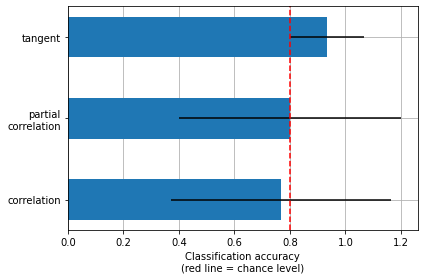

In [ ]:
mean_scores = [np.mean(scores[kind]) for kind in kinds]
scores_std = [np.std(scores[kind]) for kind in kinds]

plt.figure(figsize=(6, 4))
positions = np.arange(len(kinds)) * .1 + .1
plt.barh(positions, mean_scores, align='center', height=.05, xerr=scores_std)
yticks = [k.replace(' ', '\n') for k in kinds]
plt.yticks(positions, yticks)
plt.gca().grid(True)
plt.gca().set_axisbelow(True)
plt.gca().axvline(.8, color='red', linestyle='--')
plt.xlabel('Classification accuracy\n(red line = chance level)')
plt.tight_layout()

In [ ]:
!pip install mat73

In [ ]:

from scipy.io import loadmat

import mat73
spmmat = mat73.loadmat('/content/derivatives-sub-xp101-NF_bold-d_sub-xp101_task-eegNF_NFbold_scores.mat')

#spmmat = loadmat('/content/derivatives-sub-xp101-NF_bold-d_sub-xp101_task-eegNF_NFbold_scores.mat')

#normalize all regressors for visualisation purpose
designMatrix = spmmat
names = i for i in spmmat
#normed_design = designMatrix / np.abs(designMatrix).max(axis=0)
# plot design matrix
fig, ax = plt.subplots(figsize=(8, 8))
plt.imshow(normed_design, aspect='auto', cmap='gray', interpolation='none')
ax.set_ylabel('Volume id')
ax.set_xticks(np.arange(len(names)))
ax.set_xticklabels(names, rotation=90);

In [ ]:
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
np.random.seed(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 10

In [ ]:
len(X)
len(Y)

30

NameError: ignored

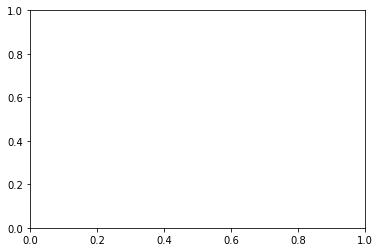

In [ ]:
# Generate the class/group data
n_points = 100
X = X
y = Y



# Evenly spaced groups repeated once
groups = [0,1]


def visualize_groups(classes, groups):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(range(len(groups)),  [.5] * len(groups), c=groups, marker='_',
               lw=50, cmap=cmap_data)
    ax.scatter(range(len(groups)),  [3.5] * len(groups), c=classes, marker='_',
               lw=50, cmap=cmap_data)
    ax.set(ylim=[-1, 5], yticks=[.5, 3.5],
           yticklabels=['Data\ngroup', 'Data\nclass'], xlabel="Sample index")


visualize_groups(y, groups)

In [ ]:
len(Y)

30

In [ ]:
print("each fold should have less than 50 K:", len(Y)/10)

each fold should have less than 50 K: 3.0


In [ ]:
train, test in cv.split(pooled_subjects, classes)

In [ ]:
test
train

array([ 2,  3,  4,  5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29])

In [ ]:
classes[train]

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
classes[test]

array([1, 1, 1])

In [ ]:
predictions

array([1, 1, 1])

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)

In [ ]:
len(pooled_subjects)

30

In [ ]:
classes

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

NameError: ignored

In [ ]:
len(Y)
len(X)
groups

[0, 1]

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)

In [ ]:
i = 1
for train, val in skf.split(pooled_subjects, classes):
  print("iteration", i)
  print(train, "train fold:", len(train))
  print(val, "val fold:", len(val))
  print("........................")
  i += 1

iteration 1
[ 2  3  4  5 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29] train fold: 24
[0 1 6 7 8 9] val fold: 6
........................
iteration 2
[ 0  1  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29] train fold: 24
[ 2 10 11 12 13 14] val fold: 6
........................
iteration 3
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24 25 26 27 28 29] train fold: 24
[ 3 15 16 17 18 19] val fold: 6
........................
iteration 4
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 25 26 27 28 29] train fold: 24
[ 4 20 21 22 23 24] val fold: 6
........................
iteration 5
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] train fold: 24
[ 5 25 26 27 28 29] val fold: 6
........................


In [ ]:
kf = KFold(n_splits=5, shuffle=False, random_state=None)

In [ ]:
i = 1
for train, val in kf.split(pooled_subjects,classes):
  print("iteration", i)
  print(train, "train fold:", len(train))
  print(val, "val fold:", len(val))
  print("........................")
  i += 1

iteration 1
[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29] train fold: 24
[0 1 2 3 4 5] val fold: 6
........................
iteration 2
[ 0  1  2  3  4  5 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29] train fold: 24
[ 6  7  8  9 10 11] val fold: 6
........................
iteration 3
[ 0  1  2  3  4  5  6  7  8  9 10 11 18 19 20 21 22 23 24 25 26 27 28 29] train fold: 24
[12 13 14 15 16 17] val fold: 6
........................
iteration 4
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 24 25 26 27 28 29] train fold: 24
[18 19 20 21 22 23] val fold: 6
........................
iteration 5
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] train fold: 24
[24 25 26 27 28 29] val fold: 6
........................
